# Iris Flower Species Prediction with different Algorithms

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.plotting.register_matplotlib_converters
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

## Load and Inspect Data

In [209]:
iris_data = pd.read_csv("iris.csv", index_col="Id")
print(list(iris_data.columns))
iris_data

['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)', 'Species']


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## Data Exploration

### Impact of Individual Features

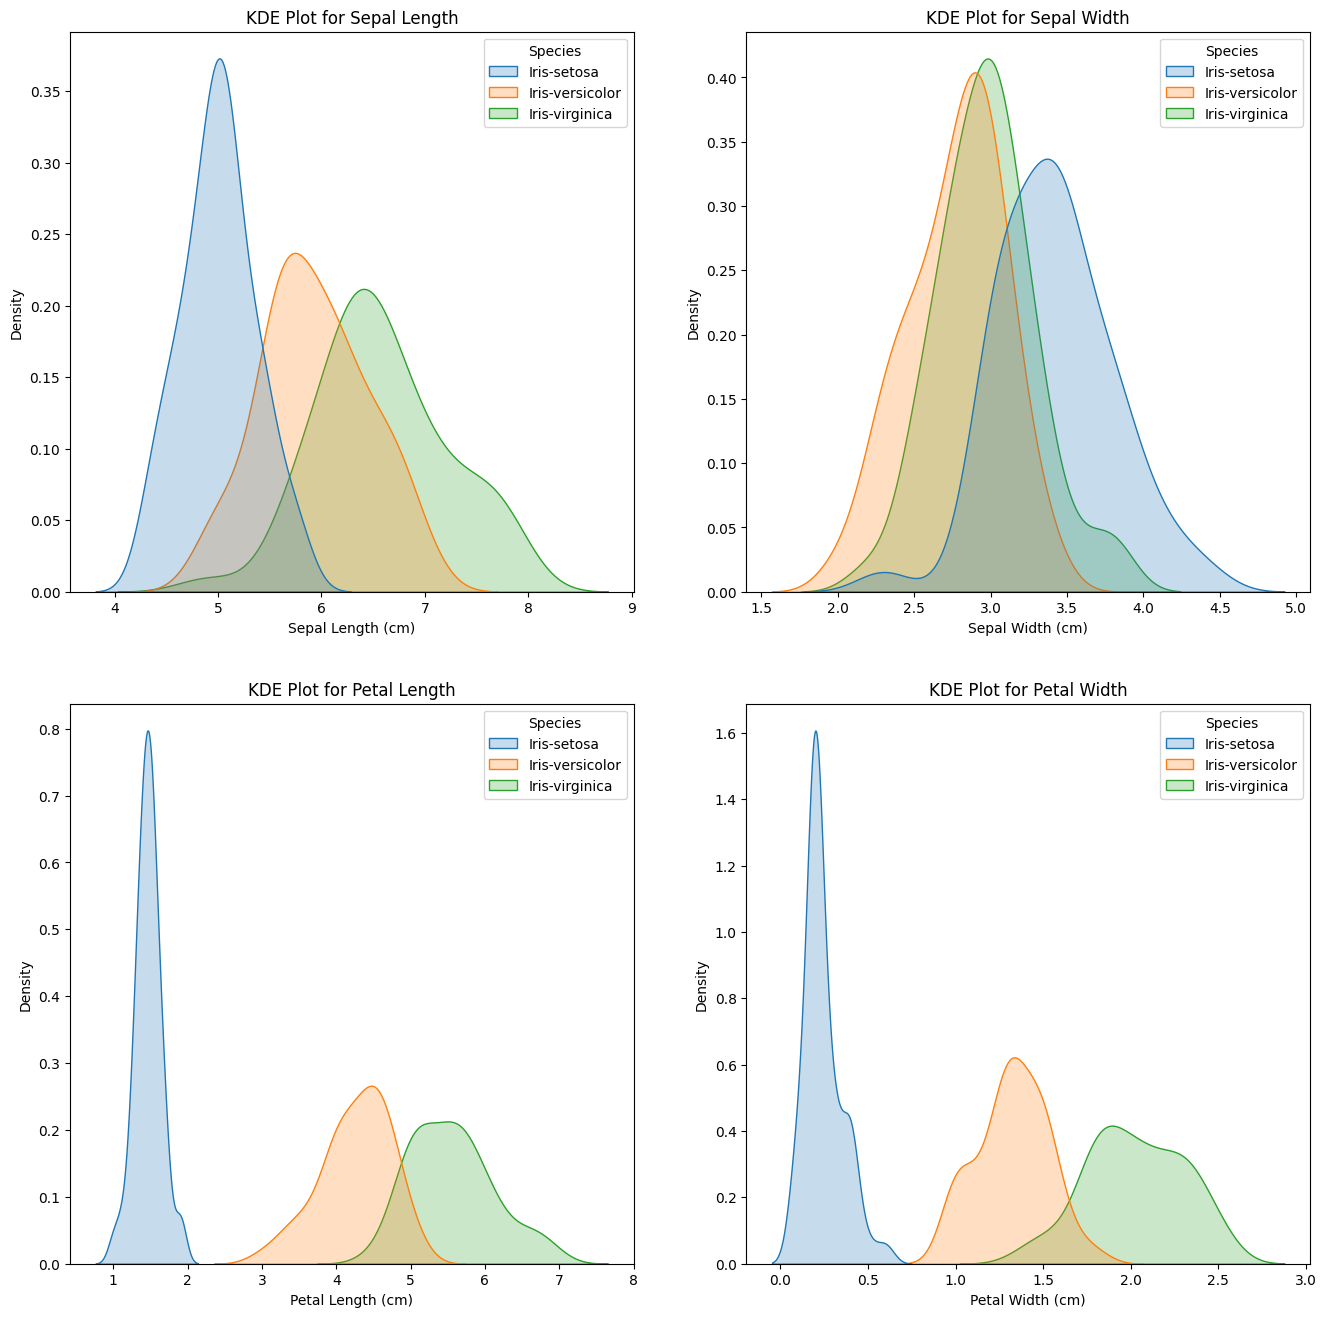

In [210]:

# Create a single figure with two subplots
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(16, 16))

# Create the first Seaborn plot on the first subplot (ax1)
sns.kdeplot(data=iris_data, x='Sepal Length (cm)', hue='Species', fill=True, ax=ax1)
ax1.set_title('KDE Plot for Sepal Length')

# Create the second Seaborn plot on the second subplot (ax2)
sns.kdeplot(data=iris_data, x='Sepal Width (cm)', hue='Species', fill=True, ax=ax2)
ax2.set_title('KDE Plot for Sepal Width')

# Create the third Seaborn plot on the third subplot (ax3)
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', fill=True, ax=ax3)
ax3.set_title("KDE Plot for Petal Length")

# Create the fourth Seaborn plot on the fourth subplot(ax4)
sns.kdeplot(data=iris_data, x='Petal Width (cm)', hue='Species', fill=True, ax=ax4)
ax4.set_title("KDE Plot for Petal Width")


# Show the figure with both subplots
plt.show()

**Insights from KDE Plot**
- Iris Setosa could be categorized based on petal length or petal widh

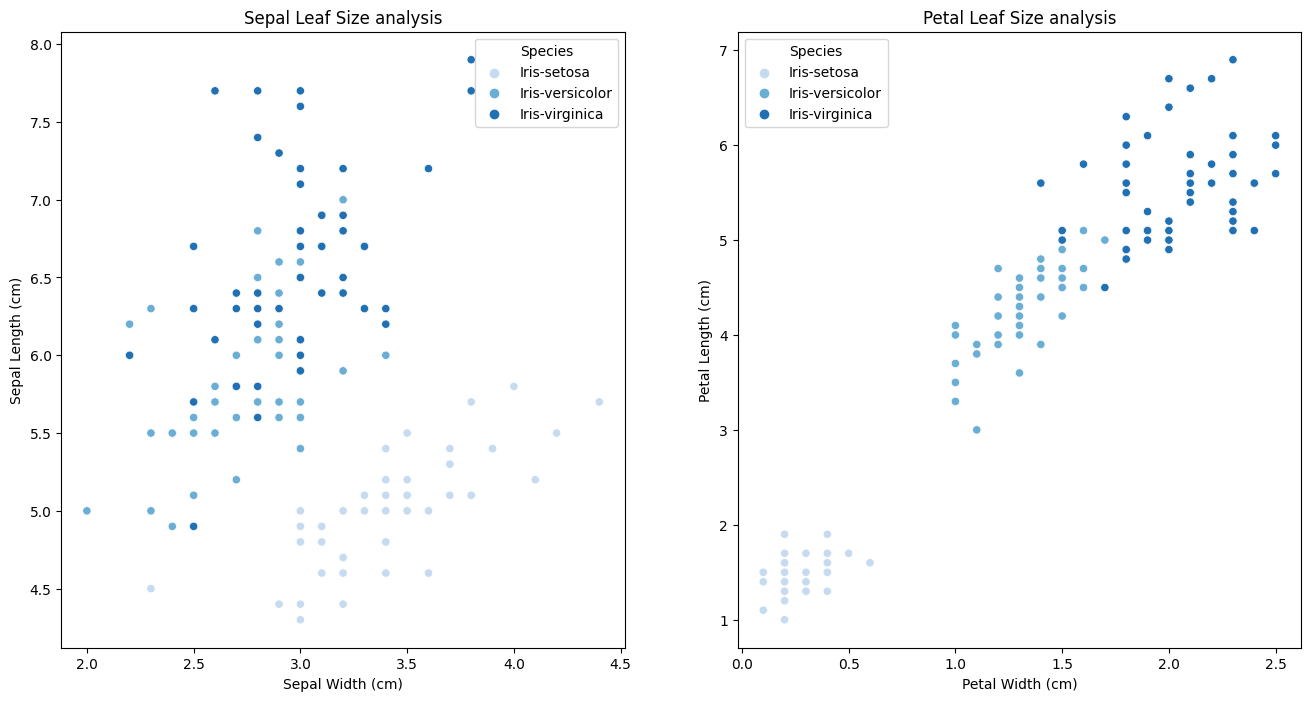

In [211]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(data=iris_data, x='Sepal Width (cm)', y='Sepal Length (cm)', hue='Species', ax=ax1, palette="Blues")
ax1.set_title('Sepal Leaf Size analysis')

sns.scatterplot(data=iris_data, x='Petal Width (cm)', y='Petal Length (cm)', hue='Species', ax=ax2, palette="Blues")
ax2.set_title("Petal Leaf Size analysis")

plt.show()

Color palette choice link for hue: https://www.practicalpythonfordatascience.com/ap_seaborn_palette

## Overall EDA Insights
- Separable with lines or planes
- Suitable model: SVM

## Train Model
### Prepare Data Frame

In [212]:
labelEncoder = LabelEncoder()
iris_cleaned_data = iris_data
iris_cleaned_data['Species'] = labelEncoder.fit_transform(iris_data['Species'])
iris_cleaned_data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


### Split Data into Train and Test Set

In [213]:
X = iris_cleaned_data.drop(['Species'], axis=1)
y = iris_cleaned_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22)

### Train and Test Model

In [214]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
accuracy = svm_model.score(X_test, y_test) * 100
print(f"Model Accuracy: {accuracy}%")

Model Accuracy: 0.9393939393939394


### Testing with different numbers of Regularization parameters

Text(0, 0.5, 'Accuracy (%)')

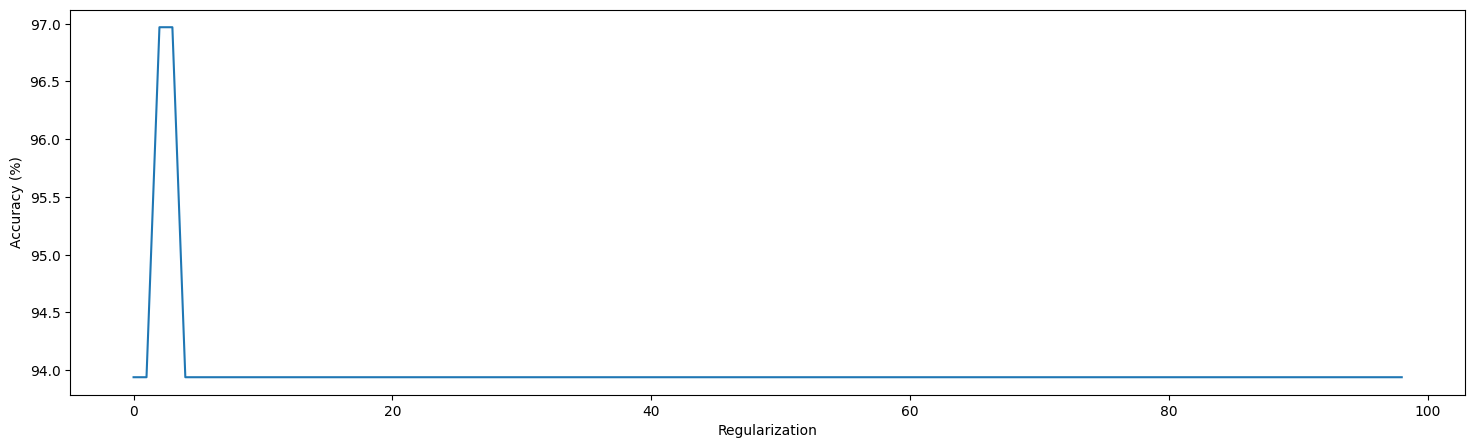

In [215]:
scores = []
for i in range(1, 100):
  svm_model = SVC(C=i)
  svm_model.fit(X_train, y_train)
  score = svm_model.score(X_test, y_test) * 100
  # print(f"For regularization: {i}, Accuracy: {score}%")
  scores.append(score)
plt.figure(figsize=(18, 5))
sns.lineplot(data=scores)
plt.xlabel("Regularization")
plt.ylabel("Accuracy (%)")

### Testing with different number of gamma values

### Testing with different types of kernels